Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        64
           2       1.00      1.00      1.00        58

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



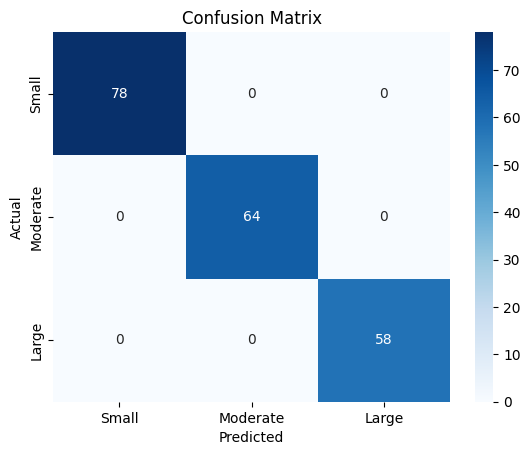

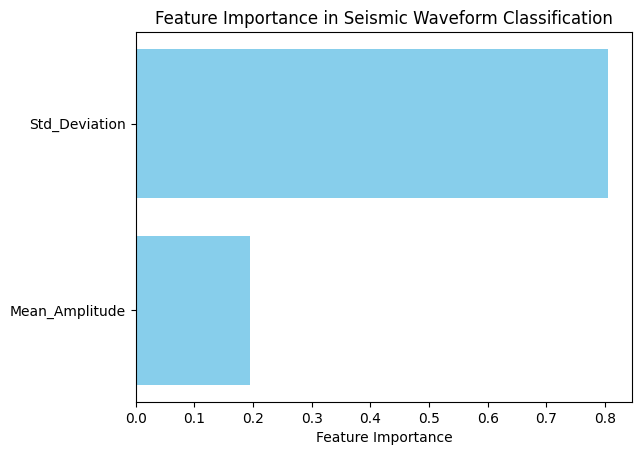

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from scipy.signal import butter, filtfilt

# Step 1: Generate synthetic seismic waveform data
np.random.seed(42)
n_samples = 1000
n_timesteps = 100  # Length of waveform

# Generate synthetic waveforms (random noise with earthquake patterns)
def generate_waveform(category):
    t = np.linspace(0, 10, n_timesteps)
    noise = np.random.normal(0, 0.5, n_timesteps)
    signal = np.sin(t * (category + 1)) * (category + 1) + noise
    return signal

categories = np.random.choice([0, 1, 2], n_samples)
waveforms = np.array([generate_waveform(cat) for cat in categories])

# Apply Butterworth filter to simulate real seismic signals
def butter_lowpass_filter(data, cutoff=2.0, fs=10.0, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

filtered_waveforms = np.array([butter_lowpass_filter(w) for w in waveforms])

# Create DataFrame
features = np.hstack((filtered_waveforms.mean(axis=1).reshape(-1, 1), 
                       filtered_waveforms.std(axis=1).reshape(-1, 1)))
data = pd.DataFrame(features, columns=['Mean_Amplitude', 'Std_Deviation'])
data['Category'] = categories

# Step 2: Split data into training and testing sets
X = data[['Mean_Amplitude', 'Std_Deviation']]
y = data['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Step 5: Compute and visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Small', 'Moderate', 'Large'], yticklabels=['Small', 'Moderate', 'Large'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 6: Visualize feature importance
importances = clf.feature_importances_
features = X.columns
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Seismic Waveform Classification')
plt.show()
